In [16]:
########################
# **Following code copied from Experimental_Variogram.ipynb from
# https://github.com/GatorGlaciology/GlacierStats/blob/main/GlacierStats/Experimental_Variogram.ipynb
########################

# load dependencies
import math

import numpy as np
import pandas as pd

# sample change
a = 2

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import geostatspy.geostats as geostats

In [17]:
df_bed = pd.read_csv('Nioghalvfjerds_bed_data.csv') # download data
df_bed.head() # display data

,X,Y,Bed
0,461890.0,-1047400.0,-171.94
1,461820.0,-1047400.0,-178.19
2,461750.0,-1047500.0,-176.95
3,461680.0,-1047600.0,-178.70
4,461640.0,-1047600.0,-185.96


In [18]:
print('The data length is ' +  str(len(df_bed)))

The data length is 104292


<function matplotlib.pyplot.show(close=None, block=None)>

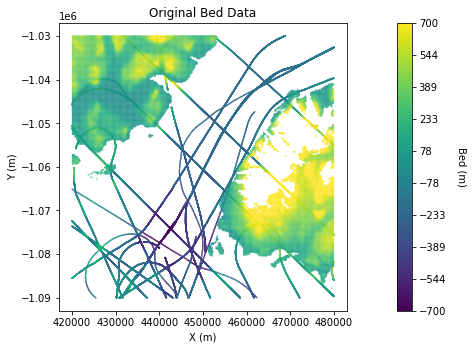

In [19]:
# plot original data
im = plt.scatter(df_bed['X'],df_bed['Y'], c = df_bed['Bed'], vmin = -700, vmax = 700, marker=".", s = 0.5) # scatter plot for location map
plt.title('Original Bed Data')                                    # add plot title
plt.xlabel('X (m)'); plt.ylabel('Y (m)')                          # set axis labels
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-700, 700, 10)) # add vertical color bar
cbar.set_label("Bed (m)", rotation=270, labelpad=20)      # add labels to the color bar
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0) # adjust the plot size
plt.axis('scaled')

plt.show

########################
# **End of copied code
########################

In [20]:
# finding min x, y values
min_vals = df_bed.min()
minX = min_vals.loc['X']
minY = min_vals.loc['Y']

# finding max x, y values
max_vals = df_bed.max()
maxX = max_vals.loc['X']
maxY = max_vals.loc['Y']

# distance in which window is moving
# NOTE: Has not been tested
stepX = 5
stepY = 5

# creating box
originX = int(minX)
originY = int(minY)
boxLength = math.trunc((maxX - minX) / 10)
boxHeight = math.trunc((maxY - minY) / 10)

itemCount = 0
totalBedData = 0


# Conceptually: Loops through the entire map/data set
# NOTE: Has not been tested
# while originX <= maxX and originY <= maxY
# Increment: originX += boxLength and originY += boxHeight


# Entire bed data ranges
# originX, (originX + boxLength)
# originY, (originY + boxHeight)

# Trimmed bed data ranges
# originX, (originX + 101)
# -1050710, (-1050700 + 1)

# Loops through the points within the created box
for x in range(originX, (originX + 101)):
    for y in range(-1050710, (-1050700 + 1)):

        # retrieves row based on x, y
        df_index = df_bed[(df_bed['X'] == x) & (df_bed['Y'] == y)]

        # retrieving bed info from row
        if not df_index.empty:
            temp_val = df_index.iloc[-1]['Bed']

            # tracking running total
            totalBedData += temp_val
            itemCount += 1

# finding average within the area
average_bed = (totalBedData / itemCount)
print("Bed Average: " + str(average_bed))

bed_var = 0
for x in range(originX, (originX + 101)):
    for y in range(-1050710, -1050700 + 1):

        # retrieves row based on x, y
        df_index = df_bed[(df_bed['X'] == x) & (df_bed['Y'] == y)]

        # retrieving bed info from row
        if not df_index.empty:
            temp_val = df_index.iloc[-1]['Bed']

            bed_var += pow((temp_val - average_bed), 2)

print("Bed Variance: " + str(bed_var))

Bed Average: 42.08233333333334
Bed Variance: 1.3216113333333444


In [ ]:
# Conceptually: Loops through the entire map/data set
# NOTE: Has not been tested
while originX <= maxX and originY <= maxY:

    # Entire bed data ranges
    # originX, (originX + boxLength)
    # originY, (originY + boxHeight)

    # Trimmed bed data ranges
    # originX, (originX + 101)
    # -1050710, (-1050700 + 1)

    # Loops through the points within the created box
    for x in range(originX, (originX + boxLength)):
        for y in range(originY, (originY + boxHeight)):

            # retrieves row based on x, y
            df_index = df_bed[(df_bed['X'] == x) & (df_bed['Y'] == y)]

            # retrieving bed info from row
            if not df_index.empty:
                temp_val = df_index.iloc[-1]['Bed']

                # tracking running total
                totalBedData += temp_val
                itemCount += 1

    # finding average within the area
    average_bed = (totalBedData / itemCount)
    print("Bed Average: " + str(average_bed))

    bed_var = 0
    for x in range(originX, (originX + boxLength)):
        for y in range(originY, (originY + boxHeight)):

            # retrieves row based on x, y
            df_index = df_bed[(df_bed['X'] == x) & (df_bed['Y'] == y)]

            # retrieving bed info from row
            if not df_index.empty:
                temp_val = df_index.iloc[-1]['Bed']

                bed_var += pow((temp_val - average_bed), 2)

    print("Bed Variance: " + str(bed_var))

    # Incrementing originX and originY
    originX += boxLength
    originY += boxHeight